## Neural Network Model

In [266]:
import jenkspy as jenkspy
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

In [267]:
df=pd.read_csv('prepared_data.csv')
df.head(30)

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,...,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,stroke
0,0.931846,0,1,2.500974,0.859059,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
1,1.673346,0,1,-0.056516,0.279850,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,1
2,-0.094846,0,0,1.303993,0.548264,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,1
3,1.616307,1,0,1.364196,-0.920950,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,1
4,1.730384,0,0,1.616050,-0.214597,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
5,1.331115,1,1,-0.802911,-0.440630,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,1
6,1.045923,0,0,-0.296704,-1.090475,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,1
7,1.559269,0,0,-1.042890,-0.892696,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,1
8,1.730384,1,0,-0.587512,-0.115708,0,0,1,0,0,...,1,0,1,0,0,0,1,1,0,1
9,0.589615,0,1,0.246375,0.887313,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,1


In [268]:
breaks = jenkspy.jenks_breaks(df['age'], nb_class=10)
print(breaks)
df['age'] = pd.cut(df['age'], bins=breaks, labels=["1", "2", "3", "4", "5","6","7","8","9","10"])
df.head(30)

[-1.8060002037748208, -1.5208079189339547, -1.1785771771249152, -0.8363464353158757, -0.4941156935068361, -0.1518849516977966, 0.1903457901112428, 0.5325765319202823, 0.9318457306974952, 1.3881533864428812, 1.7874225852200938]


,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,...,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,stroke
0,8,0,1,2.500974,0.859059,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
1,10,0,1,-0.056516,0.279850,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,1
2,6,0,0,1.303993,0.548264,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,1
3,10,1,0,1.364196,-0.920950,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,1
4,10,0,0,1.616050,-0.214597,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
5,9,1,1,-0.802911,-0.440630,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,1
6,9,0,0,-0.296704,-1.090475,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,1
7,10,0,0,-1.042890,-0.892696,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,1
8,10,1,0,-0.587512,-0.115708,0,0,1,0,0,...,1,0,1,0,0,0,1,1,0,1
9,8,0,1,0.246375,0.887313,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,1


In [269]:
df[df['age'].isna()==True]

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,...,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,stroke
579,NaN,0,0,-0.352949,1.268744,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
622,NaN,0,0,-0.506686,0.180960,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
642,NaN,0,0,-0.040267,-0.920950,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
652,NaN,0,0,-0.896236,-0.765552,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
694,NaN,0,0,-0.379405,-1.288253,0,0,1,0,0,...,1,0,1,0,0,0,1,1,0,0
697,NaN,0,0,-0.511894,-0.822060,0,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
708,NaN,0,0,-0.655007,0.972075,0,0,1,0,0,...,0,1,1,0,0,1,0,1,0,0
730,NaN,0,0,-0.451482,-0.666663,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
763,NaN,0,0,0.216794,0.760170,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
773,NaN,0,0,0.706961,-1.090475,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0


In [270]:
df['age'].fillna("1",inplace=True)



In [271]:
breaks = jenkspy.jenks_breaks(df['avg_glucose_level'], nb_class=6)
print(breaks)
df['avg_glucose_level'] = pd.cut(df['avg_glucose_level'], bins=breaks, labels=["1", "2", "3", "4", "5", "6"])
df

[-1.1147589901189745, -0.6429242284489848, -0.2056698510779877, 0.3982369807459855, 1.303993070697912, 2.185376239186091, 3.3977728453314957]


,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,...,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,stroke
0,8,0,1,6,0.859059,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
1,10,0,1,3,0.279850,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,1
2,6,0,0,4,0.548264,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,1
3,10,1,0,5,-0.920950,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,1
4,10,0,0,5,-0.214597,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,4,0,0,1,-0.227499,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
4190,4,0,0,5,0.345098,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
4191,5,1,0,2,0.402209,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
4192,4,0,0,2,0.025377,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0


In [272]:
df['avg_glucose_level'].fillna("1",inplace=True)
df.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
Residence_type_Rural              0
Residence_type_Urban              0
stroke                            0
dtype: int64

In [273]:
df=pd.get_dummies(df,columns=['age','avg_glucose_level'])
df=df.drop(columns=['age_1','avg_glucose_level_1'])
df

,hypertension,heart_disease,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,...,age_6,age_7,age_8,age_9,age_10,avg_glucose_level_2,avg_glucose_level_3,avg_glucose_level_4,avg_glucose_level_5,avg_glucose_level_6
0,0,1,0.859059,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0.279850,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0.548264,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,-0.920950,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,-0.214597,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,0,0,-0.227499,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4190,0,0,0.345098,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4191,1,0,0.402209,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4192,0,0,0.025377,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [274]:
train, test = train_test_split(df,test_size=0.2)
train

,hypertension,heart_disease,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,...,age_6,age_7,age_8,age_9,age_10,avg_glucose_level_2,avg_glucose_level_3,avg_glucose_level_4,avg_glucose_level_5,avg_glucose_level_6
759,0,0,0.336358,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1359,0,0,0.689534,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2516,0,1,0.039690,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1179,1,0,0.618899,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1147,1,0,0.392866,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,0,0,-0.186343,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2046,0,0,-0.709044,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2112,0,0,-1.570794,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3219,0,0,0.322231,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### stroke = 1 <<<< stroke =0 => need to add

<AxesSubplot:title={'center':'count (Stroke)'}>

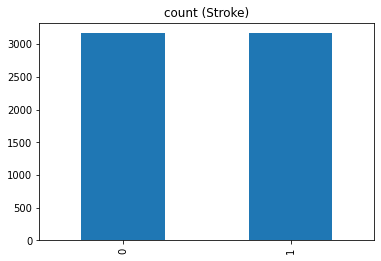

In [275]:
class_count_1, class_count_2 = train['stroke'].value_counts()
#seprate 2 classes of Outcome
class_1 = train[train['stroke'] == 0]
class_2 = train[train['stroke'] == 1]# print the shape of the class
#print('class 1:', class_1.shape)
#print('class 2:', class_2.shape)
class_2_over = class_2.sample(class_count_1, replace=True)
test_over = pd.concat([class_2_over, class_1], axis=0)
#print("total Outcome of 1 and 2:",test_over['Outcome'].value_counts())# plot the count after under-sampeling
test_over['stroke'].value_counts().plot(kind='bar', title='count (Stroke)')

In [276]:
y_train=test_over['stroke']
x_train=test_over.drop(columns='stroke')
x_train

,hypertension,heart_disease,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,...,age_6,age_7,age_8,age_9,age_10,avg_glucose_level_2,avg_glucose_level_3,avg_glucose_level_4,avg_glucose_level_5,avg_glucose_level_6
138,0,0,-0.454757,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4015,0,0,-0.208046,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
85,0,0,0.576518,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
174,0,0,-0.454757,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4043,1,1,-0.321621,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,0,0,-0.186343,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2046,0,0,-0.709044,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2112,0,0,-1.570794,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3219,0,0,0.322231,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [277]:
y_test=test['stroke']
x_test=test.drop(columns='stroke')
x_test

,hypertension,heart_disease,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,...,age_6,age_7,age_8,age_9,age_10,avg_glucose_level_2,avg_glucose_level_3,avg_glucose_level_4,avg_glucose_level_5,avg_glucose_level_6
3850,0,0,0.590645,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2600,0,0,-0.172216,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2482,0,0,-0.567774,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3216,0,1,0.053817,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1072,0,0,-0.200470,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,0,0.025563,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3200,0,0,-0.680790,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
796,0,0,-1.104602,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2636,0,0,-0.694917,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [278]:
mlp = MLPClassifier(hidden_layer_sizes=(25,50, 100), max_iter=1000,alpha=1)
mlp.fit(x_train, y_train.values.ravel())
y_predicted=mlp.predict(x_test)
print('acc for training data: {:.3f}'.format(mlp.score(x_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(x_test, y_test)))

acc for training data: 0.966
acc for test data: 0.846


In [279]:
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

[[692  89]
 [ 40  18]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.91       781
           1       0.17      0.31      0.22        58

    accuracy                           0.85       839
   macro avg       0.56      0.60      0.57       839
weighted avg       0.89      0.85      0.87       839

